Notebook to compare Race Rocks lighthouse daily salinity readings with nowcasts.
* http://www.pac.dfo-mpo.gc.ca/science/oceans/data-donnees/lighthouses-phares/index-eng.html


Lighthouse salinty readings are collected at the daytime high tide. I will compare with both nowcast and spinup daily averages.

Temperature is also available, but it is complicated by the time shift in the high tide and the diurnal vairability in temperature. I will not look at temperature for now, but could come up with a fair comparison later.

In [1]:
import pandas as pd
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import datetime

import seaborn as sns

from salishsea_tools.nowcast import analyze
from salishsea_tools import tidetools, viz_tools

%matplotlib inline

In [2]:
sns.set_style('darkgrid')

# Observations

In [3]:
url = 'http://www.pac.dfo-mpo.gc.ca/science/oceans/data-donnees/lighthouses-phares/data/racerockday.txt'
obs = pd.read_table(url, delim_whitespace=True, skiprows=2, na_values=99.9,
                    parse_dates ={'date':[0,1,2]}, keep_date_col=True)
obs['date'] = pd.to_datetime(obs['date'])
obs[['Month','Day']] = obs[['Month','Day']].astype(int) 

Extract lat/lon

In [4]:
data=pd.read_csv(url, nrows=1, delim_whitespace=True, header=None, skiprows=1)
lat = float(data[2])
lon = float(- data[3])

In [5]:
print lat, lon

48.18 -123.32


## Monthly averages

(28, 33)

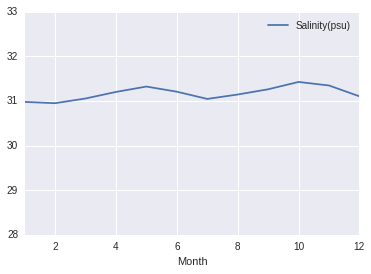

In [6]:
fig,ax= plt.subplots(1,1)
grouped = obs.groupby(['Month'])
mean = grouped.apply(np.mean)
mean.plot(y='Salinity(psu)', ax=ax)
ax.set_ylim([28,33])


Why is there a fresh trend in the winter? Rain? 

The power spectrum in Griffin and Leblond shows a peak at the 6 month frequency. 

#Model

Grid and index

In [7]:
grid = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
X = grid.variables['nav_lon'][:]
Y = grid.variables['nav_lat'][:]
bathy = grid.variables['Bathymetry'][:]
j, i = tidetools.find_closest_model_point(lon,lat,X,Y,bathy)

In [8]:
to = datetime.datetime(2014,10,27)
tf = datetime.datetime(2015,6,30)

#daily averages
files = analyze.get_filenames(to,tf,'1d','grid_T','/data/dlatorne/MEOPAR/SalishSea/nowcast/')
sal_daily, time_daily = analyze.combine_files(files, 'vosaline',0,j,i)


#Plotting

##Nowcasts

<matplotlib.contour.QuadContourSet instance at 0x7f2aeeff9a28>

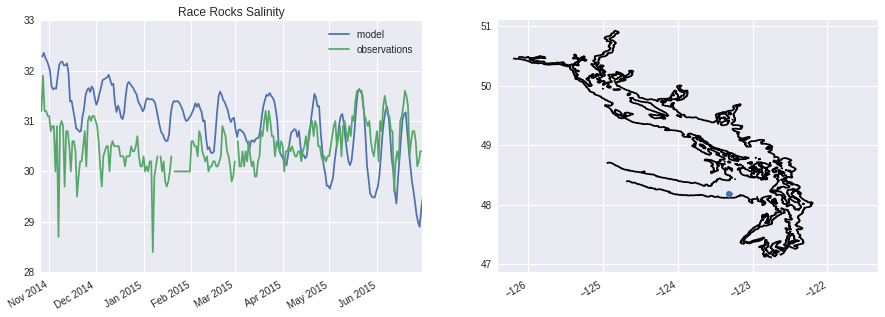

In [9]:
fig,axs=plt.subplots(1,2,figsize=(15,5))

#plot time series
ax=axs[0]
ax.plot(time_daily,sal_daily,label='model ')
ax.plot(obs['date'], obs['Salinity(psu)'], label ='observations')
ax.legend(loc=0)
ax.set_title('Race Rocks Salinity')
ax.set_xlim([to,tf])
ax.set_ylim([28,33])
fig.autofmt_xdate()
#plot map
axm=axs[1]
axm.plot(lon, lat, 'o')
viz_tools.plot_coastline(axm,grid,coords='map')

Is that really where Race Rocks is?

#Spinups
Does it make sense to compare with observations if we used climatological values for run off?

In [10]:
to = datetime.datetime(2003,1,1)
tf = datetime.datetime(2003,12,31)

#spinups a
files = analyze.get_filenames(to,tf,'1d','grid_T','/ocean//dlatorne/MEOPAR/SalishSea/results/spin-up/')
sal_spin, time_spin = analyze.combine_files(files, 'vosaline',0,j,i)


<matplotlib.contour.QuadContourSet instance at 0x7f2aeee98908>

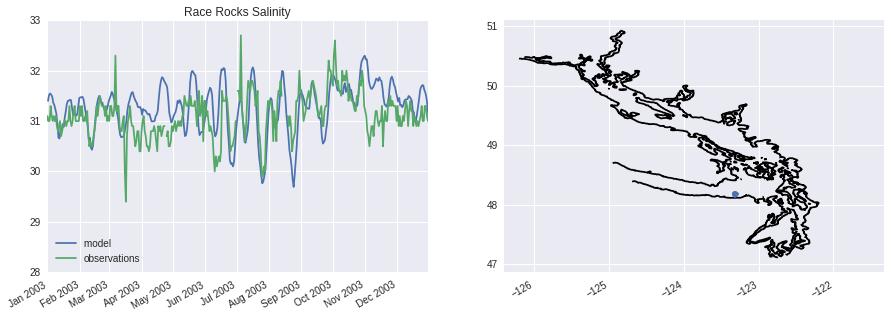

In [11]:
fig,axs=plt.subplots(1,2,figsize=(15,5))

#plot time series
ax=axs[0]
ax.plot(time_spin,sal_spin,label='model ')
ax.plot(obs['date'], obs['Salinity(psu)'], label ='observations')
ax.legend(loc=0)
ax.set_title('Race Rocks Salinity')
ax.set_xlim([to,tf])
ax.set_ylim([28,33])
fig.autofmt_xdate()

#plot map
axm=axs[1]
axm.plot(lon, lat, 'o')
viz_tools.plot_coastline(axm,grid,coords='map')

#Modify Race Rocks Location
The location of Race Rocks looks a bit off on the map. But this is directly from the data file..

Look up lat/lon of Race Rocks on lighthouse website and redo comparison.
http://www.lighthousefriends.com/light.asp?ID=1102

In [12]:
lat =48.29837
lon -123.53171

j, i = tidetools.find_closest_model_point(lon,lat,X,Y,bathy)

##Nowcast

<matplotlib.contour.QuadContourSet instance at 0x7f2aeed3b638>

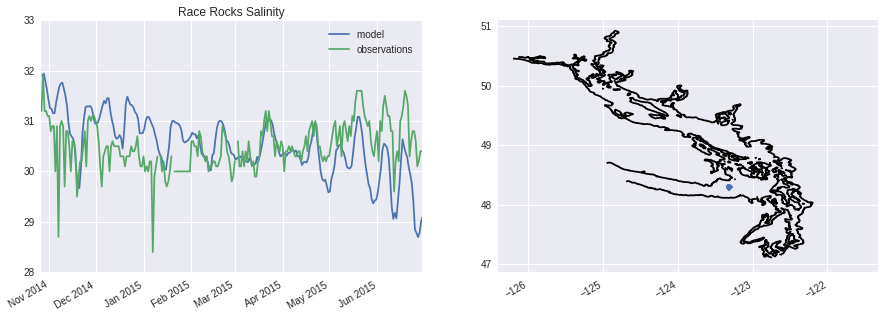

In [13]:
to = datetime.datetime(2014,10,27)
tf = datetime.datetime(2015,6,30)

#daily averages
files = analyze.get_filenames(to,tf,'1d','grid_T','/data/dlatorne/MEOPAR/SalishSea/nowcast/')
sal, time = analyze.combine_files(files, 'vosaline',0,j,i)

fig,axs=plt.subplots(1,2,figsize=(15,5))

#plot time series
ax=axs[0]
ax.plot(time,sal,label='model ')
ax.plot(obs['date'], obs['Salinity(psu)'], label ='observations')
ax.legend(loc=0)
ax.set_title('Race Rocks Salinity')
ax.set_xlim([to,tf])
ax.set_ylim([28,33])
fig.autofmt_xdate()

#plot map
axm=axs[1]
axm.plot(lon, lat, 'o')
viz_tools.plot_coastline(axm,grid,coords='map')

* Model is saliter in November, December, January
* Model is about right in February, March, April
* Model is fresher in May, June

## Spinup

<matplotlib.contour.QuadContourSet instance at 0x7f2aee873dd0>

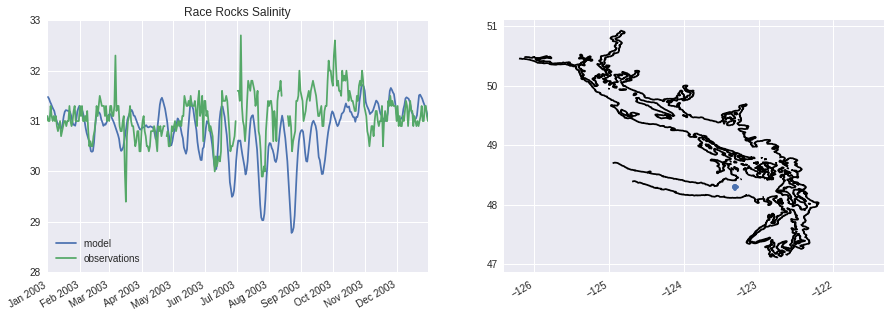

In [14]:
to = datetime.datetime(2003,1,1)
tf = datetime.datetime(2003,12,31)

#daily averages
files = analyze.get_filenames(to,tf,'1d','grid_T','/ocean/dlatorne/MEOPAR/SalishSea/results/spin-up/')
sal, time = analyze.combine_files(files, 'vosaline',0,j,i)

fig,axs=plt.subplots(1,2,figsize=(15,5))

#plot time series
ax=axs[0]
ax.plot(time,sal,label='model ')
ax.plot(obs['date'], obs['Salinity(psu)'], label ='observations')
ax.legend(loc=0)
ax.set_title('Race Rocks Salinity')
ax.set_xlim([to,tf])
ax.set_ylim([28,33])
fig.autofmt_xdate()

#plot map
axm=axs[1]
axm.plot(lon, lat, 'o')
viz_tools.plot_coastline(axm,grid,coords='map')

Model is fresher in the late summer and fall. Note, we used climatological river discharge, but the nowcast seems to have similar trend - too fresh in summer. Nowcast was also too salty in winter 2014/2015.

## Next

* Possibly look at other lighthouses
   * Active Pass (not sure if that will work since we have it closed)
   * Entrance Island
   * Chrome Island
   * Departure Bay